# Quick Start

The easiest way to start is to use a Jupyter notebook and review the results as you get them.

Let us start with a very first example:

1. Create a solar system with all planets and Pluto.
2. Add one asteroid 463 Lola.
3. Verify if this asteroid is a resonant one.

## NB

*  Note that the first run might take some time because the app needs to download the AstDys catalogue and the data for the Solar System.
* `sim.dt` is set to `1` to speed up this test run, and `sim.plot` is set to `show` to show the results in the notebook (rather than saving them in PNG).

In [3]:
%%capture
! pip install /Users/smirik/projects/resonances

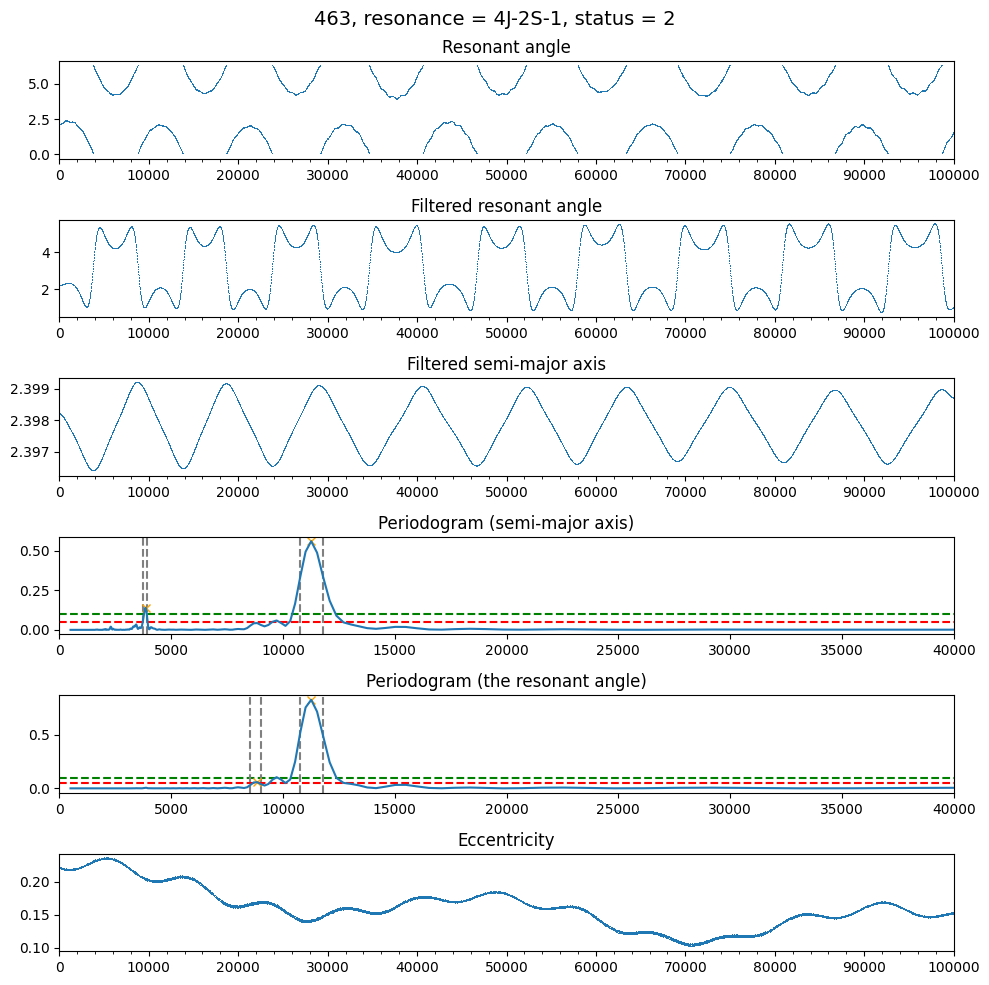

In [5]:
import resonances

sim = resonances.check(463, '4J-2S-1')
sim.run()

You might see on the plot:

- the resonant angle vs time,
- the filtered values of the resonant angle and semi-major axis vs time,
- the periodograms of both variables, eccentricity vs time.

As expected, the asteroid 463 Lola is in three-body body mean-motion resonance with Jupiter and Saturn, which is defined in the code `4J-2S-1` (`J` means Jupiter, `S` means Saturn, `4`, `-2`, and `-1` are integers), because the resonant angle librates and the periodograms have a shared peak around `11000` years.

There are extra lines on the panels related to the periodograms of the semi-major axis and the resonant angle. 

- The vertical gray dashed lines highlights the peaks related to the frequencies of oscillations. In other words, if there is a libration with the period of `10,000` years, the gray lines will be near `10,000`. The first line represents the start of the peak (which corresponds to the minimum value of libration's period), whereas the second line represents the end of the peak (the maximum value). If there are several possible frequencies, there will be multiple gray lines: two per peak.
- The red and green horizontal lines represents the critical values for the frequency to be identified. If the maximum value (the peak value, which is marked with a cross) is greater than the green line, then one might consider the frequency to be reliably determined. If the value is below the red line, then this is a false positive. For the peaks between the green and the red lines, it is up to the researcher to decide.

    Note that you might change the critical values (which are set by default to `0.05` and `0.1`) related to the green and red lines, depending on your model and simulation. The corresponding config values are provided in the [Config section](../config) of the documentation. 


Now you can check other asteroids (just change their titles) or resonances. If you need a better precision, do not hesitate to remove `sim.dt=1` (to use the default value `0.1`).

## What's next

- The examples of how the package can be used is in the [Examples](../examples) Section.
- There are a few more examples in the [Simulation and Bodies](../core) Section.
- The description of how the resonance identification procedure works are in [Libration](../libration) Section.
- The description of default config values and how to change them is in [Config](../config).
- A few examples of some tasks, i.e. identification of the resonances for the given asteroid, are in [Advanced](../console) Section.